# 1.importing packages

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()

# 2. Reading data

In [2]:
stock_raw_data = pd.read_csv(r"C:\Users\Tarun\Desktop\DS\Machine Learning\TimeSeries\class assessment\SBI_Historical_Data.csv")

In [3]:
stock_raw_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


# 3.1 Dimension

In [4]:
stock_raw_data.shape

(1385, 7)

In [5]:
stock_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


# 3.2 Statistical summary

In [6]:
stock_raw_data.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


### Checking for null values

In [7]:
stock_raw_data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

**Changing Date datatype to datetime**

In [8]:
stock_data = stock_raw_data.copy()

In [9]:
stock_data['Date'] = stock_data['Date'].apply(lambda x:pd.to_datetime(x))

In [10]:
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%


In [11]:
stock_data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

**Checking stock time stamp**

In [12]:
stock_data['Date'].min()

Timestamp('2015-01-01 00:00:00')

In [13]:
stock_data['Date'].max()

Timestamp('2020-08-07 00:00:00')

**Remove columns that we do not need**

In [14]:
cols = ['Vol.', 'Change %', 'Low', 'High', 'Open']
stock_data_1 = stock_data.drop(cols, axis=1, inplace=True)
stock_data_1 = stock_data.sort_values('Date')

In [15]:
stock_data_1.isnull().sum()

Date     0
Price    0
dtype: int64

# 3.5 Indexing with date

In [16]:
stock_data_1 = stock_data_1.groupby('Date')['Price'].sum().reset_index()
stock_data_1

,Date,Price
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-05,312.75
3,2015-01-06,299.90
4,2015-01-07,300.15
...,...,...
1380,2020-08-03,192.25
1381,2020-08-04,191.60
1382,2020-08-05,191.45
1383,2020-08-06,190.95


In [17]:
stock_data_1['Date']= pd.to_datetime(stock_data_1['Date'])
stock_data_1.set_index('Date',inplace=True)
stock_data_1.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', name='Date', length=1385, freq=None)

In [18]:
stock_data_1.head()

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15


# 4. Visualizing data

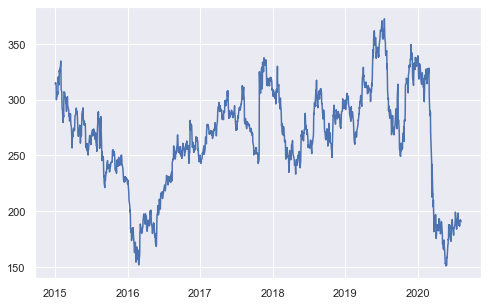

In [19]:
# plotting 6 yrs data

plt.figure(figsize=(8,5))
plt.plot(stock_data_1)
plt.show()

**Sampling**

In [20]:
data = stock_data_1['Price'].resample('MS').mean()
data.head()

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
Freq: MS, Name: Price, dtype: float64

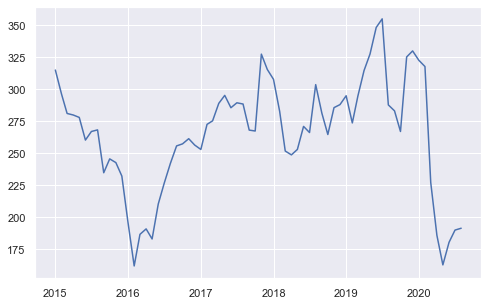

In [21]:
#after sampling

plt.figure(figsize=(8,5))
plt.plot(data)
plt.show()

**Decomposing**

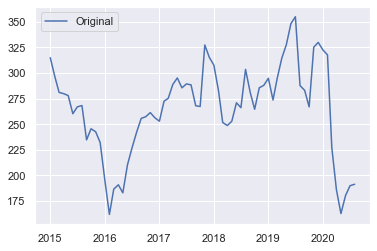

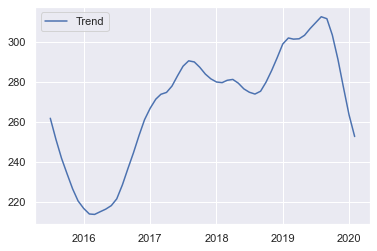

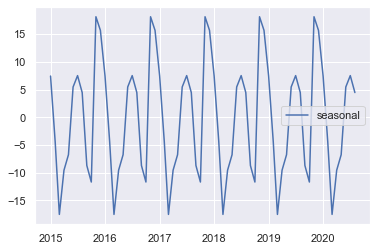

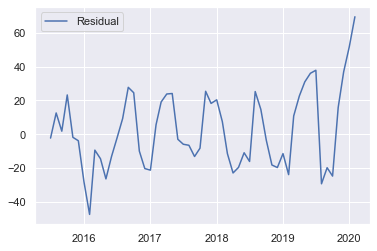

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend,label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

# ADF Test

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def ad_test(timeseries):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistics','p-value','#Lags Used',
                                            'Number of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s) '%key] = value
    print(dfoutput)

In [25]:
ad_test(data)

Results of Dickey Fuller Test:
Test statistics                -2.460279
p-value                         0.125440
#Lags Used                      1.000000
Number of Observations used    66.000000
Critical value (1%)            -3.533560
Critical value (5%)            -2.906444
Critical value (10%)           -2.590724
dtype: float64


Test statistics > critical value, hence we reject the null hypothesis which implies series is not stationary

# KPSS Test

In [26]:
#KPSS test is a statistical test to check for stationarity of a series around a deterministic trend.
#Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series.

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print('Results of KPSS Test')
    kpsstest = kpss(timeseries,regression='c',nlags='legacy')

#regression: str{“c”, “ct”}
#The null hypothesis for the KPSS test.
#“c” : The data is stationary around a constant (default).
#“ct” : The data is stationary around a trend.
#nlags: {str, int}, optional
#Indicates the number of lags to be used
#If set to “legacy”, uses int(12 * (n / 100)**(1 / 4))

    
    kpss_output = pd.Series(kpsstest[0:3],index=['Test Statistics','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical value (%s)'%key] = value
    print(kpss_output)

In [27]:
kpss_test(data)

Results of KPSS Test
Test Statistics           0.141737
p-value                   0.100000
Lags Used                11.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64


C:\Users\Tarun\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Test statistics < critical value, hence we reject the null hypothesis which implies series is stationary

**Differencing to remove seasonality**

In [28]:
#Differencing is performed by subtracting the previous observation from the current observation.
#Differencing can help stablize the mean of the time series by removing changes in the level of a time
#series and so eliminating trends and seasonality

data = data - data.shift(1)

#The shift() function is used to shift index by desired number of periods with an optional time freq.
#When freq is not passed, shift the index without realigning the data.

<AxesSubplot:xlabel='Date'>

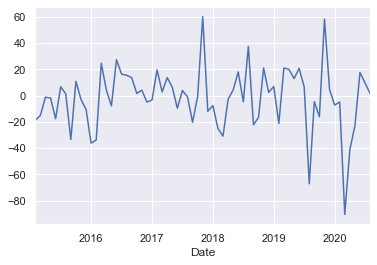

In [29]:
data.dropna(inplace=True)
data.plot()

**Decomposing again**

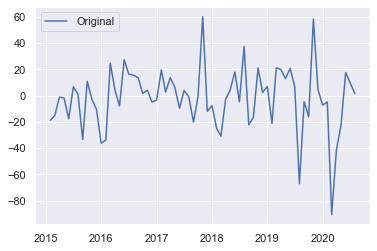

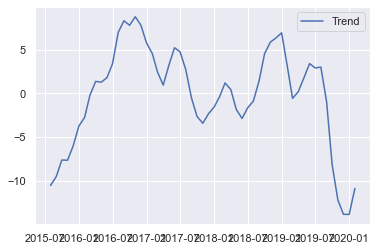

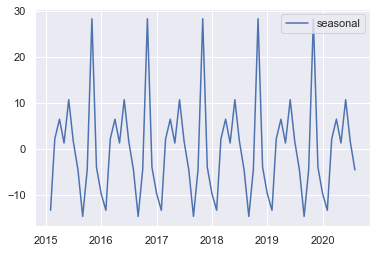

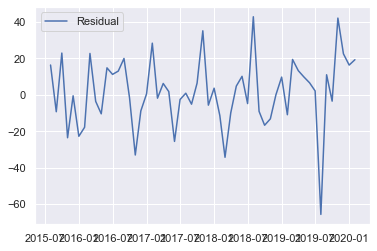

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend,label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

### 5. Time Series Forecasting using ARIMA

In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#The m parameter influences the p, d, and q parameters. For example, an m of 12 for monthly data
#suggests a yearly seasonal cycle.
print('Examples for parameter combination for Seasonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[4]))

Examples for parameter combination for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 0, 0, 12)


**Split the data into train and test**

In [32]:
size = int(len(data)*0.95)
train,test = data[0:size],data[size:len(data)]

In [33]:
test.head()

Date
2020-05-01   -23.078070
2020-06-01    17.622010
2020-07-01     9.550988
2020-08-01     1.451739
Freq: MS, Name: Price, dtype: float64

### 5.1 Parameter Selection

In [34]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param, 
                                            seasonal_order=param_seasonal, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.0176020406128
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:468.41710772870243
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:496.6096221950082
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:366.5131642928724
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:477.6963736316133
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:468.05799304486493
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:369.7808848651431
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:358.72164913876395
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:565.3557946844729
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:460.32600113093673
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.60818870777985
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:360.5729568954015
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:479.1909096970233
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:460.8301172954792
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:371.65469211625134
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:352.15931033181374
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:597.0631111621734
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:485.1780177261005
ARI

C:\Users\Tarun\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:481.58960493833763
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:356.04300821933936
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:475.28887672516396
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:456.14067873513113
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:366.44947148440514
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:348.224136027874
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:573.8736061094216
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:469.86843295060487
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:497.9412489343222
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:368.2314925070086
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:468.6654205108501
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:469.7144053280819
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:360.9707411926344
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:360.7180690731309
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:567.3551810624582
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:462.27437041648324
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:489.489274179424
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:361.7297384888206
ARIMA

In [35]:
print(min(aic_list))
min_val = aic_list.index(min(aic_list))
min_val

348.224136027874


31

In [36]:
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

## 5.2 Fitiing ARIMA Model

In [37]:
mod = sm.tsa.statespace.SARIMAX(train,
                               order=order,
                               seasonal_order=seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0815      0.221     -4.904      0.000      -1.514      -0.649
ar.S.L12      -0.8119      0.164     -4.950      0.000      -1.133      -0.490
ma.S.L12      -0.2666      0.370     -0.721      0.471      -0.992       0.458
sigma2       603.2457    245.865      2.454      0.014     121.358    1085.133


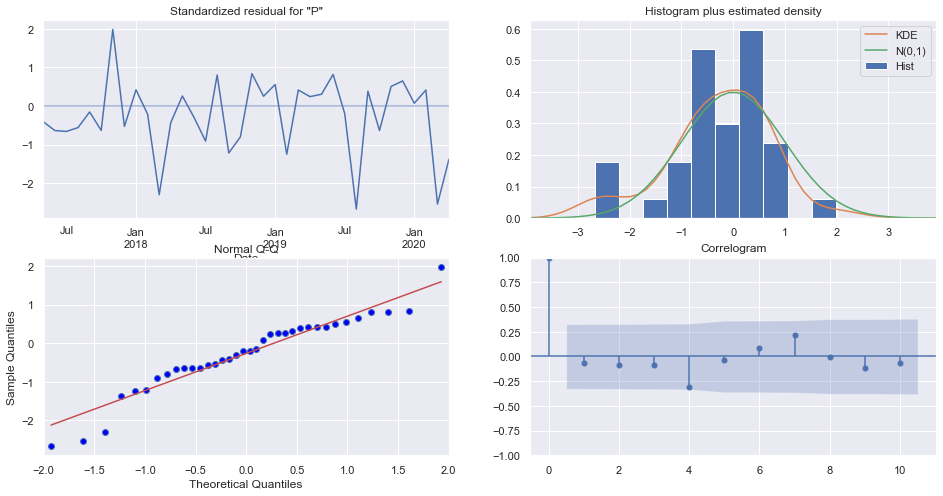

In [38]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

## 5.3 Validating Forecasts

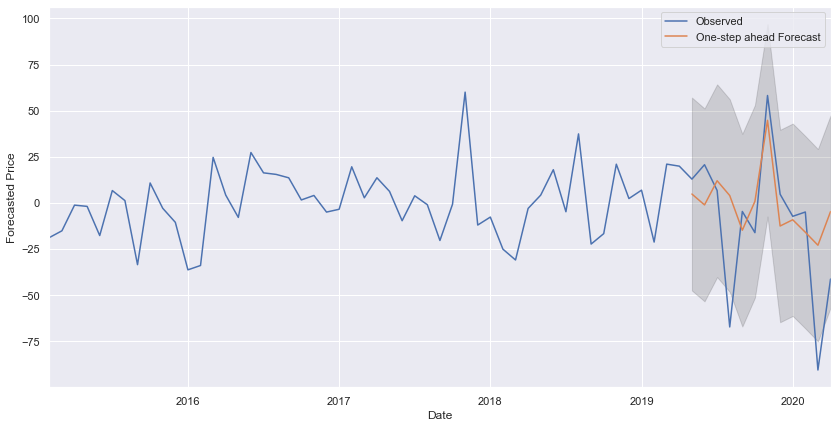

In [39]:
# set forecast to start at 2019-05-01 to the end of the data to forecast

pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
#conf_int: Returns the confidence interval of the filled parameters
ax = train['2015':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color='k', alpha=0.15)
ax.set_xlabel('Date')
ax.set_ylabel('Forecasted Price')
plt.legend()
plt.show() 

**5.4 Calculating MSE and RMSE**

In [40]:
y_forecasted = pred.predicted_mean
y_truth = train['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean squared Error of our forecasts is 1045.01
The Root Mean squared Error of our forecasts is 32.33


**5.5 Visulaizing the Forecast**

            lower Price  upper Price
2020-05-01   -55.671130    48.536303
2020-06-01   -47.007975    57.494546
2020-07-01   -61.539343    43.257434
2020-08-01   -23.654545    81.435666
2020-09-01   -80.681060    24.701767
2020-10-01   -71.374434    34.300198
2020-11-01   -34.741701    71.223933
2020-12-01   -61.351627    44.904212
2021-01-01   -56.321247    50.224020
2021-02-01   -81.335880    25.504245
2021-03-01   -42.571505    64.556449
2021-04-01   -41.224975    66.190037
2021-05-01   -48.825066    58.578037


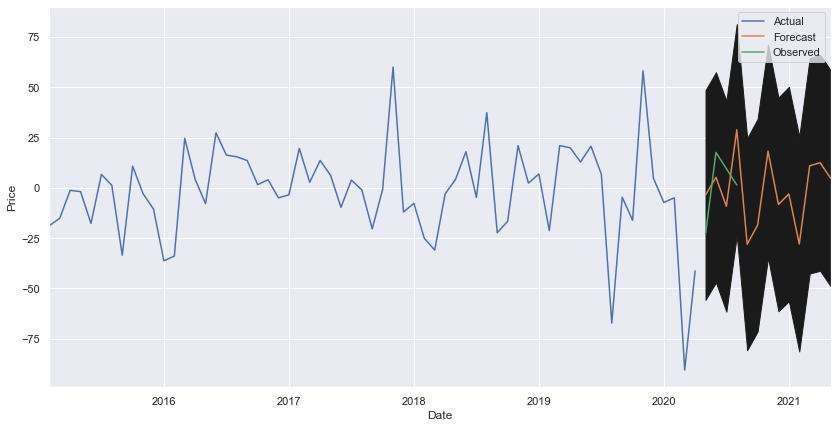

In [41]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = train.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color='k', alpha=1)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label="Observed")
print(pred_ci)
plt.legend(loc='best')
plt.show()

**5.6 Comparing the predictions**

In [42]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper Price']
Result

,Actual,Predicted
Date,,
2020-05-01,-23.078070,48.536303
2020-06-01,17.622010,57.494546
2020-07-01,9.550988,43.257434
2020-08-01,1.451739,81.435666


In [43]:
mse = ((Result['Actual'] - Result['Predicted']) ** 2).mean()
print('The Mean squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean squared Error of our forecasts is 3563.0
The Root Mean squared Error of our forecasts is 59.69


# Conclusion

The stock price increases and decreases irrespective of season.
Stock price can be analyised using multivariate time series also